In [725]:
import csv
import pydot
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import scipy.stats as stats
import random
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import warnings
from sklearn.naive_bayes import GaussianNB

In [726]:
trainx=pd.read_csv("./HeartDisease.csv")

In [727]:
print(trainx.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num    Place  
0    0  Hungary  
1    0  Hungary  
2    0  Hungary  
3    0  Hungary  
4    0  Hungary  


In [728]:
trainx.describe()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


Pasamos la variable de lugar a numerica. 0 para hungary, 1 para VA y 2 para otros

In [729]:
train = trainx.copy()
train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")] = 2
train["Place"][train["Place"] == "Hungary"] = 0
train["Place"][train["Place"] == "VA"] = 1
#
#pdf = train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")]

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Diagramas
Para la primera parte del proyecto se pide realizar histogramas y diagrmas de torta con los datos cargados en el paso anterior para lo cual se deben convertir a enteros mediante la funcion convertirentero, para los histogramas usamos la funcion graficar y para los diagramas de torta la funcion graficarpie, al final tenemos un for que recorre cada columna del dataFrame y la pasa a la funcion correspondiente, como se ve a continuacion:


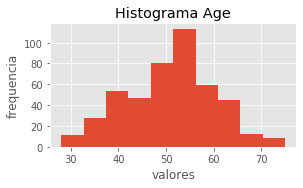

<Figure size 1152x648 with 0 Axes>

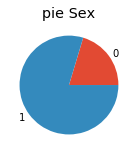

<Figure size 1152x648 with 0 Axes>

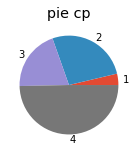

D:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\ANACONDA\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1152x648 with 0 Axes>

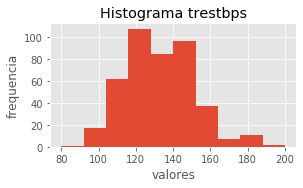

<Figure size 1152x648 with 0 Axes>

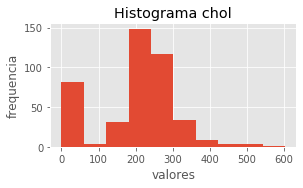

<Figure size 1152x648 with 0 Axes>

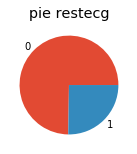

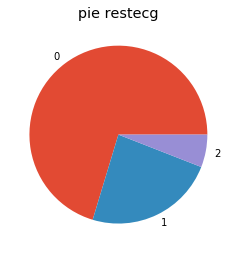

<Figure size 1152x648 with 0 Axes>

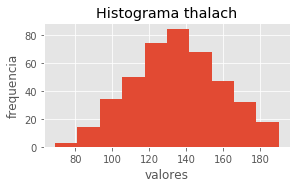

<Figure size 1152x648 with 0 Axes>

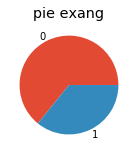

<Figure size 1152x648 with 0 Axes>

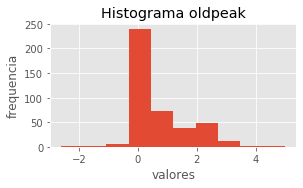

<Figure size 1152x648 with 0 Axes>

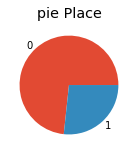

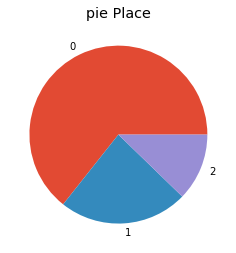

<Figure size 1152x648 with 0 Axes>

In [730]:
def graficar(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    plt.subplot2grid((2,3),(0,0))
    plt.hist(vector, 10)
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title('Histograma'+ ' ' + nombre)
    plt.show()
    plt.clf()
    
def graficarpie(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    veces0 = np.count_nonzero(vector == 0)
    veces1 = np.count_nonzero(vector == 1)
    veces2 = np.count_nonzero(vector == 2)
    veces3 = np.count_nonzero(vector == 3)
    veces4 = np.count_nonzero(vector == 4)
    if veces0 != 0 and veces1 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces0,veces1],labels =["0","1"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()
    if veces0 != 0 and veces1 != 0 and veces2 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces0,veces1,veces2],labels =["0","1","2"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()
    if veces1 != 0 and veces2 != 0 and veces3 != 0 and veces4 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces1,veces2,veces3,veces4],labels =["1","2","3","4"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()


for columna in train:
    if columna == "oldpeak" or columna == "thalach" or columna == "chol" or columna == "trestbps" or columna == "Age":
        graficar(train[columna].values,columna)
    elif columna == "Sex" or columna == "Place" or columna == "exang" or columna == "restecg" or columna == "fps" or columna == "cp":
        graficarpie(train[columna].values,columna)
    
        
    


In [731]:
print(train.isnull().sum().sum())

217


In [732]:
train.describe()


,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [733]:
print(train.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num Place  
0    0     0  
1    0     0  
2    0     0  
3    0     0  
4    0     0  


### Analizamos como rellenar los datos faltantes
- En el colesterol (chol) es interesante pensar en el promedio, 
    aunque se me ocurren muchas maneras, como poner el promedio de similares.
- En la presion arterial con la que ingresaron (trestbps) es interesante utilizar promedio
    aunque plantear el uso de similitudes se debe considerar.
- En el campo que indica si si tiene el azucar en la sangre > 120 mg/dl (fbs) se debe considerar que 1 es para true
    y 0 es para false, sin embargo no es un campo que podamos rellenar a la ligera
    por lo tanto se debe considerar si se elimina.
- Los resultados electrocardiográficos en reposo (restecg) son Value 0: normal, Value 1: con anormalidad de la onda ST-T (inversiones de la onda T y / o elevación o depresión del ST> 0.05 mV) y Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes. Por todo lo anterior rellenarlos no es factible con el promedio.
- La frecuencia cardíaca máxima alcanzada (thalach) es otro atributo que se puede relenar con promedios pero
    considerando que esto es un principal sintoma de afeciones cardiacas, por lo que recomiendo
    utilizar el promedio pero de los que poseen afecciones en caso de afectado, o promedio de los que no en caso
    de ser una persona que no se le encontro afeciones cardiacas.
- La depresión del ST inducida por el ejercicio relativo al descanso (oldpeak) tiene como valores Valor 1: pendiente ascendente - Valor 2: plano - Valor 3: pendiente descendente. este valor no es factible rellenarlo
- La angina inducida por ejercicio (1 = sí; 0 = no) (exang) es otro valor que conviene analizar la forma de rellenarlo, ya que aplicar un simple promedio no es valido.

    


## Rellenando los datos con ayuda medica
Para tener unos datos mas confiables la información restante se completa utilizando el criterios medicos encontrados en la web y con la ayuda del medico xxxx quien presto su asesoramiento en temas cardiacos. Por tal motivo los se definen los datos faltamtes de esta forma:

- En el colesterol (chol) se rellena con promedio, pero relacionando afeciones cardiacas con dicho promedio, es decir si el dato faltante corresponde a una persona con afeccion cardiaca se rellena con promedio de afecciones cardiacas.

In [734]:
cholPromDisease = train["chol"][train["num"] == 1].mean()
cholPromNotDisease = train["chol"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y colesterol
train["chol"][train["num"] == 0] = train["chol"].fillna(cholPromNotDisease)
train["chol"][train["num"] == 1] = train["chol"].fillna(cholPromDisease)
print(cholPromNotDisease)
print(cholPromDisease)

print(train.isnull().sum().sum())
#.mean ()

217.30701754385964
180.66502463054186
191


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


- En la presion arterial con la que ingresaron (trestbps) se plantea el mismo tipo de promedio que en Colesterol

In [735]:
trestbpsPromDisease = train["trestbps"][train["num"] == 1].mean()
trestbpsPromNotDisease = train["trestbps"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["trestbps"][train["num"] == 0] = train["trestbps"].fillna(trestbpsPromNotDisease)
train["trestbps"][train["num"] == 1] = train["trestbps"].fillna(trestbpsPromDisease)
print(trestbpsPromNotDisease)
print(trestbpsPromDisease)

print(train.isnull().sum().sum())

130.3920704845815
132.751269035533
158


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


- La frecuencia cardíaca máxima alcanzada (thalach) se rellena igual que el colesterol

In [736]:
thalachPromDisease = train["thalach"][train["num"] == 1].mean()
thalachPromNotDisease = train["thalach"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["thalach"][train["num"] == 0] = train["thalach"].fillna(trestbpsPromNotDisease)
train["thalach"][train["num"] == 1] = train["thalach"].fillna(trestbpsPromDisease)
print(thalachPromNotDisease)
print(thalachPromDisease)

print(train.isnull().sum().sum())

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


141.88105726872246
126.87817258883248
125


- El valor de angina por ejercicio es muy interesante de analizar. Esta condicion se presenta normalmente en personas mayores de 30 (mujeres 35/40) con enfermedad arterial coronaria (EAC), es decir se presenta cuando aparece una condicion cardiaca y como el estrechamiento de la válvula aórtica del corazón (estenosis aórtica). que tambien se relaciona con taponamientos debido a altos niveles de colesterol. Dado lo anterior se propone rellenar este valor dependiendo de si presenta una afeccion cardiaca, si tiene un colestrol alto y si es mayor de 35.

In [737]:
train["exang"][(train["num"] == 1) & (train["Age"] > 35) & (train["chol"] > 160.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 1) & (train["Age"] < 30) & (train["chol"] < 130.0 ) ] = train["exang"].fillna(0)
train["exang"][(train["num"] == 0) & (train["Age"] > 35) & (train["chol"] > 190.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 0) & (train["Age"] < 30) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["exang"]=train["exang"].fillna(0)


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: Set

- Para los valores de glucosa (FBS) es interesante conocer que los niveles altos de clucosa se asocian con la diabetes que es uno de los factores mas reconocidos de la aparicion de cardiopatias, es por eso que este valor se puede rellenar considerando los valores de cardiopatias. Tambien se asocia las cardiopatias diabeticas y el colesterol alto. Por lo anterior se utilizaran estos 2 valores para aportar mas información al dataset

In [738]:
train["fbs"][(train["num"] == 1) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(1)
train["fbs"][(train["num"] == 0) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["fbs"]=train["fbs"].fillna(0)



D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Valores de electrocardiogramas y segmentos ST
Para estos valores hacer analisis sobre los datos es muy complejo, ya que son el resultado de medotod medicos muy especificos, es por tal motivo que se decide eliminar estos valores.

In [739]:
del train["restecg"]
del train["oldpeak"]
print(train.isnull().sum().sum())

0


In [740]:
print(train.head())
train.describe()


   ID  Age  Sex  cp  trestbps        chol  fbs  thalach  exang  num Place
0   1   28    1   2     130.0  132.000000  0.0    185.0    0.0    0     0
1   2   29    1   2     120.0  243.000000  0.0    160.0    0.0    0     0
2   3   29    1   2     140.0  217.307018  0.0    170.0    0.0    0     0
3   4   30    0   1     170.0  237.000000  0.0    170.0    0.0    0     0
4   5   31    0   2     100.0  219.000000  0.0    150.0    0.0    0     0


,ID,Age,Sex,cp,trestbps,chol,fbs,thalach,exang,num
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.476166,200.469340,0.310722,134.651221,0.380744,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.138033,110.263265,0.463296,23.377752,0.486102,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,69.000000,0.000000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,179.000000,0.000000,120.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,217.307018,0.000000,132.751269,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,266.000000,1.000000,150.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,190.000000,1.000000,1.000000


# ARBOL DE DESICION
Luego de rellenar los datos faltantes se procede a dividir en 2 los datos 80% para entrenamiento y 20% para pruebas, una vez divididos se pasa a realizar el punto de arbol de desicion.

Antes de llegar al paso anterior visualizamos de todos los casos cuantos nos dan positivos para enfermedad y negativos y luego vemos la relacion de edad-edad colesterol para saber si se cuenta o no con enfermedades cardiacas.

Numero de casos positivos y negativos
num
0    247
1    210
dtype: int64

 Relacion edad-colesterol, azul positivos - naranja negativo


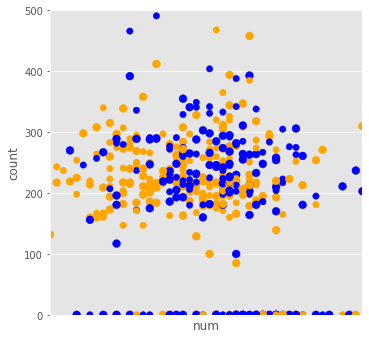

Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama


In [741]:
print("Numero de casos positivos y negativos")
print(train.groupby('num').size())

sb.catplot('num',data=train,kind="count")
#sb.catplot('Sex',data=train,kind="count")
#sb.catplot('cp',data=train,kind="count")
#sb.catplot('Age',data=train,kind="count",aspect = 3)
#sb.catplot('trestbps',data=train,kind="count",aspect = 3)

print( "\n Relacion edad-colesterol, azul positivos - naranja negativo")
f1 = train['Age'].values
f2 = train['chol'].values
#Azul positivo
#Naranja Negativo
colores=['orange','blue'] # si no estaban declarados previamente
tamanios=[60,40] # si no estaban declarados previamente
 
asignar=[]
asignar2=[]
for index, row in train.iterrows():    
    asignar.append(colores[row['num']])
    asignar2.append(tamanios[row['num']])
 
plt.scatter(f1, f2, c=asignar, s=tamanios)
plt.axis([28,75,0,500])
plt.show()

print("Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama")




# Entrenamiento
Este paso nos sirve para saber los niveles del arbol que usaremos


In [742]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(train))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0:1.1})
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] 
        f_valid = train.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['num'], axis=1), 
                               y = f_train["num"]) 
        valid_acc = model.score(X = f_valid.drop(['num'], axis=1), 
                                y = f_valid["num"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df2 = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df2 = df2[["Max Depth", "Average Accuracy"]]
print(df2.to_string(index=False))


print("Observamos que todos los elemento superan el 80% pero hay 4 que son mayores al 84% por lo tanto la profundidad del arbol sera 4")



 Max Depth  Average Accuracy
         1          0.827874
         2          0.827874
         3          0.812319
         4          0.834541
         5          0.865652
         6          0.847874
         7          0.850097
         8          0.845652
         9          0.841208
        10          0.845652
        11          0.838986
Observamos que todos los elemento superan el 80% pero hay 4 que son mayores al 84% por lo tanto la profundidad del arbol sera 4


partimos en 80 20

In [743]:
# vamos a definir los objetivos en target y los predictores
features = train[["Age","Sex","cp", "trestbps", "thalach", "exang","chol","fbs"]].values
target = train["num"].values

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)


print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(365, 8) (365,)
(92, 8) (92,)


# Creacion del arbol
Se crea el arbol de desicion y se imprime en la ultima parte del notebook

In [744]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=10,
                                            min_samples_leaf=5,
                                            max_depth = 5,
                                            )
decision_tree.fit(trainX, trainY)
#Print the score on the train data
print(decision_tree.score(trainX, trainY))
#Print the score on the test data
print(decision_tree.score(testX, testY))    
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = ["Age","Sex","cp", "trestbps", "thalach", "exang","chol","fbs"],
                              class_names = ['No Enfermo', 'Enfermo'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo

#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])#solo en ubuntu
#print(PImage("tree1.png"))#solo en ubuntu
#(graph,) = pydot.graph_from_dot_file('tree1.dot')
#graph.write_png('tree1.png')

0.8191780821917808
0.7717391304347826


# Pruebas


In [745]:
y_pred = decision_tree.predict(testX)
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(testX)
print("Probabilidad de Acierto: " + str(np.round(y_proba[0][y_pred]* 100, 2))+"%")


print(testY)
# Para árboles
from sklearn.metrics import confusion_matrix

confusion_matrix(decision_tree.predict(testX), testY)

Prediccion: [0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0]
Probabilidad de Acierto: [100.   0.   0.   0.   0. 100.   0. 100. 100.   0. 100. 100. 100.   0.
 100.   0. 100. 100.   0. 100. 100. 100.   0.   0. 100.   0.   0.   0.
 100.   0. 100.   0.   0.   0.   0. 100.   0.   0.   0. 100.   0.   0.
   0.   0. 100.   0. 100. 100. 100. 100.   0.   0. 100. 100. 100.   0.
   0. 100. 100.   0. 100.   0. 100. 100.   0.   0. 100.   0.   0.   0.
   0. 100. 100.   0.   0.   0.   0.   0. 100.   0.   0.   0. 100. 100.
   0. 100.   0. 100.   0. 100.   0. 100.]%
[0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0]


array([[30, 11],
       [10, 41]], dtype=int64)

# Arbol Resultante
A continuación se muestra el arbol resultado, es importante saber que este arbol es que se usa para la clasificación, y es resultado del entrenamiento de los datos.

![title](tree1.png)

## BAYES

## Entrenamiento
Aqui se debe considerar que la predición no se pude realizar si no se rellenan todos los datos, 
por tal motivo esta parte estara pendiente hasta discutir el relleno de datos del corazon

In [746]:
#gnb = GaussianNB()
model1 = tree.DecisionTreeClassifier(max_depth = 4)


model2 = GaussianNB()

#gnb.fit(trainX, trainY)
model1.fit(trainX, trainY)
model2.fit(trainX, trainY)
#Print the score on the train data
print(model1.score(trainX, trainY))
score = model2.score(trainX, trainY)
#Print the score on the test data
print(model1.score(testX, testY))

0.810958904109589
0.75


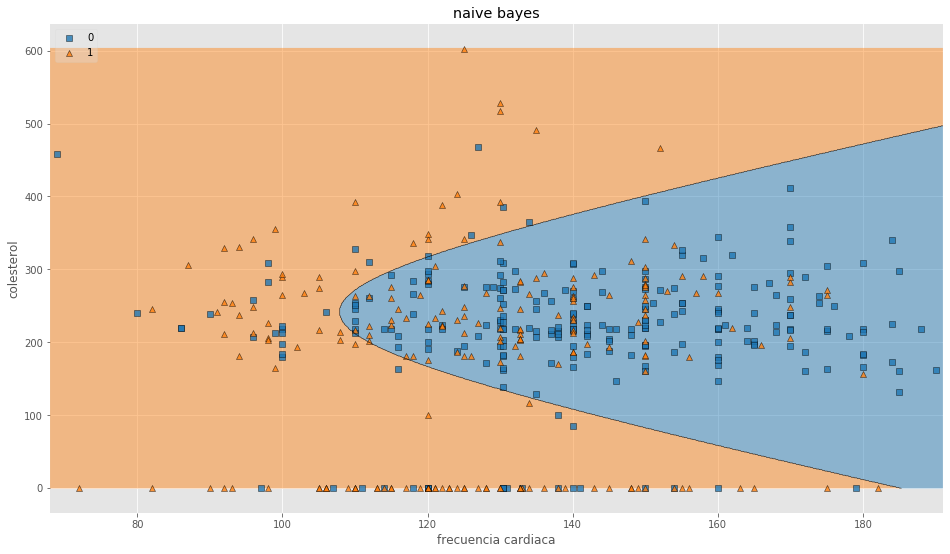

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [747]:
z = model1.predict_proba(testX)
#print(z)

# Loading some example data
#iris = datasets.load_iris()
x = np.array([train.thalach.values, train.chol.values])
X = x.transpose()
y = train.num.values
#print(X)
#print(y)
#print(train.num.values)

model22 = GaussianNB()
model22.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=model22, legend=2)

# Adding axes annotations
plt.xlabel('frecuencia cardiaca')
plt.ylabel('colesterol')
plt.title('naive bayes')
plt.show()



model21 = tree.DecisionTreeClassifier(max_depth = 4)
model21.fit(X, y)

## REDES NEURONALES

A continuacion se resolvera el problema con redes neuronales

In [748]:
from keras.models import Sequential
from keras.layers.core import Dense

# cargamos las 4 combinaciones de las compuertas XOR
training_data = trainX

# y estos son los resultados que se obtienen, en el mismo orden
target_data = trainY

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(training_data, target_data, epochs=1000,batch_size=10)

# evaluamos el modelo
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


# calcula las predicciones
predictions = model.predict(testX)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]

print(testY)

Epoch 1/1000
365/365 [==============================] - 0s 837us/step - loss: 3.0198 - acc: 0.6329
Epoch 2/1000
365/365 [==============================] - 0s 94us/step - loss: 1.2539 - acc: 0.6384
Epoch 3/1000
365/365 [==============================] - 0s 106us/step - loss: 0.7085 - acc: 0.6356
Epoch 4/1000
365/365 [==============================] - 0s 106us/step - loss: 0.6591 - acc: 0.6219
Epoch 5/1000
365/365 [==============================] - 0s 111us/step - loss: 0.6693 - acc: 0.5973
Epoch 6/1000
365/365 [==============================] - 0s 109us/step - loss: 0.6425 - acc: 0.6247
Epoch 7/1000
365/365 [==============================] - 0s 115us/step - loss: 0.6356 - acc: 0.6466
Epoch 8/1000
365/365 [==============================] - 0s 101us/step - loss: 0.6318 - acc: 0.6384
Epoch 9/1000
365/365 [==============================] - 0s 106us/step - loss: 0.6318 - acc: 0.6521
Epoch 10/1000
365/365 [==============================] - 0s 114us/step - loss: 0.6447 - acc: 0.6164
Epoch 11/1

365/365 [==============================] - 0s 101us/step - loss: 0.5410 - acc: 0.7397
Epoch 84/1000
365/365 [==============================] - 0s 104us/step - loss: 0.5205 - acc: 0.7644
Epoch 85/1000
365/365 [==============================] - 0s 101us/step - loss: 0.5266 - acc: 0.7507
Epoch 86/1000
365/365 [==============================] - 0s 100us/step - loss: 0.5256 - acc: 0.7671
Epoch 87/1000
365/365 [==============================] - 0s 98us/step - loss: 0.5473 - acc: 0.7315
Epoch 88/1000
365/365 [==============================] - 0s 101us/step - loss: 0.5551 - acc: 0.7370
Epoch 89/1000
365/365 [==============================] - 0s 100us/step - loss: 0.5199 - acc: 0.7562
Epoch 90/1000
365/365 [==============================] - 0s 104us/step - loss: 0.5221 - acc: 0.7507
Epoch 91/1000
365/365 [==============================] - 0s 97us/step - loss: 0.5241 - acc: 0.7562
Epoch 92/1000
365/365 [==============================] - 0s 104us/step - loss: 0.5204 - acc: 0.7589
Epoch 93/1000
36

365/365 [==============================] - 0s 99us/step - loss: 0.5015 - acc: 0.7562
Epoch 165/1000
365/365 [==============================] - 0s 97us/step - loss: 0.5184 - acc: 0.7397
Epoch 166/1000
365/365 [==============================] - 0s 96us/step - loss: 0.5142 - acc: 0.7534
Epoch 167/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4823 - acc: 0.7918
Epoch 168/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4845 - acc: 0.7753
Epoch 169/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4985 - acc: 0.7616
Epoch 170/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4942 - acc: 0.7589
Epoch 171/1000
365/365 [==============================] - 0s 101us/step - loss: 0.5252 - acc: 0.7452
Epoch 172/1000
365/365 [==============================] - 0s 103us/step - loss: 0.5077 - acc: 0.7562
Epoch 173/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4863 - acc: 0.7808
Epoch 174

365/365 [==============================] - 0s 97us/step - loss: 0.4886 - acc: 0.7808
Epoch 246/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4839 - acc: 0.7753
Epoch 247/1000
365/365 [==============================] - 0s 97us/step - loss: 0.4777 - acc: 0.7836
Epoch 248/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4756 - acc: 0.7836
Epoch 249/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4773 - acc: 0.7699
Epoch 250/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4732 - acc: 0.7918
Epoch 251/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4788 - acc: 0.7781
Epoch 252/1000
365/365 [==============================] - 0s 100us/step - loss: 0.4867 - acc: 0.7671
Epoch 253/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4741 - acc: 0.7890
Epoch 254/1000
365/365 [==============================] - 0s 98us/step - loss: 0.4741 - acc: 0.7808
Epoch 255/

365/365 [==============================] - 0s 101us/step - loss: 0.4699 - acc: 0.7781
Epoch 327/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4680 - acc: 0.7781
Epoch 328/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4751 - acc: 0.7836
Epoch 329/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4746 - acc: 0.7781
Epoch 330/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4611 - acc: 0.7890
Epoch 331/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4879 - acc: 0.7863
Epoch 332/1000
365/365 [==============================] - 0s 99us/step - loss: 0.5210 - acc: 0.7753
Epoch 333/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4747 - acc: 0.7781
Epoch 334/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4693 - acc: 0.7753
Epoch 335/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4778 - acc: 0.7836
Epoch 3

365/365 [==============================] - 0s 108us/step - loss: 0.4674 - acc: 0.7863
Epoch 408/1000
365/365 [==============================] - 0s 103us/step - loss: 0.4746 - acc: 0.7808
Epoch 409/1000
365/365 [==============================] - 0s 114us/step - loss: 0.4645 - acc: 0.8110
Epoch 410/1000
365/365 [==============================] - 0s 105us/step - loss: 0.4716 - acc: 0.7863
Epoch 411/1000
365/365 [==============================] - 0s 110us/step - loss: 0.4833 - acc: 0.7726
Epoch 412/1000
365/365 [==============================] - 0s 108us/step - loss: 0.4811 - acc: 0.7781
Epoch 413/1000
365/365 [==============================] - 0s 126us/step - loss: 0.4633 - acc: 0.7836
Epoch 414/1000
365/365 [==============================] - 0s 115us/step - loss: 0.4568 - acc: 0.7945
Epoch 415/1000
365/365 [==============================] - 0s 108us/step - loss: 0.4672 - acc: 0.7945
Epoch 416/1000
365/365 [==============================] - 0s 110us/step - loss: 0.4730 - acc: 0.7863
Epoch

365/365 [==============================] - 0s 111us/step - loss: 0.4544 - acc: 0.7890
Epoch 489/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4744 - acc: 0.7836
Epoch 490/1000
365/365 [==============================] - 0s 112us/step - loss: 0.4635 - acc: 0.7836
Epoch 491/1000
365/365 [==============================] - 0s 119us/step - loss: 0.4753 - acc: 0.7781
Epoch 492/1000
365/365 [==============================] - 0s 111us/step - loss: 0.4720 - acc: 0.7890
Epoch 493/1000
365/365 [==============================] - 0s 106us/step - loss: 0.4642 - acc: 0.7863
Epoch 494/1000
365/365 [==============================] - 0s 97us/step - loss: 0.4582 - acc: 0.7890
Epoch 495/1000
365/365 [==============================] - 0s 105us/step - loss: 0.4582 - acc: 0.7808
Epoch 496/1000
365/365 [==============================] - 0s 102us/step - loss: 0.4721 - acc: 0.7945
Epoch 497/1000
365/365 [==============================] - 0s 108us/step - loss: 0.4802 - acc: 0.7726
Epoch 

365/365 [==============================] - 0s 115us/step - loss: 0.4664 - acc: 0.7890
Epoch 570/1000
365/365 [==============================] - 0s 110us/step - loss: 0.4711 - acc: 0.7863
Epoch 571/1000
365/365 [==============================] - 0s 110us/step - loss: 0.4638 - acc: 0.7863
Epoch 572/1000
365/365 [==============================] - 0s 109us/step - loss: 0.4512 - acc: 0.7863
Epoch 573/1000
365/365 [==============================] - 0s 111us/step - loss: 0.4534 - acc: 0.7945
Epoch 574/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4515 - acc: 0.7973
Epoch 575/1000
365/365 [==============================] - 0s 112us/step - loss: 0.4485 - acc: 0.7973
Epoch 576/1000
365/365 [==============================] - 0s 108us/step - loss: 0.4528 - acc: 0.7890
Epoch 577/1000
365/365 [==============================] - 0s 111us/step - loss: 0.4642 - acc: 0.7726
Epoch 578/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4556 - acc: 0.7945
Epoch

365/365 [==============================] - 0s 104us/step - loss: 0.4355 - acc: 0.8055
Epoch 651/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4784 - acc: 0.7890
Epoch 652/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4456 - acc: 0.8000
Epoch 653/1000
365/365 [==============================] - 0s 96us/step - loss: 0.4680 - acc: 0.7890
Epoch 654/1000
365/365 [==============================] - 0s 102us/step - loss: 0.4853 - acc: 0.7699
Epoch 655/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4524 - acc: 0.7836
Epoch 656/1000
365/365 [==============================] - 0s 99us/step - loss: 0.4603 - acc: 0.7918
Epoch 657/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4570 - acc: 0.7836
Epoch 658/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4514 - acc: 0.7890
Epoch 659/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4523 - acc: 0.7890
Epoch 660/10

365/365 [==============================] - 0s 123us/step - loss: 0.4567 - acc: 0.7863
Epoch 732/1000
365/365 [==============================] - 0s 113us/step - loss: 0.4454 - acc: 0.7945
Epoch 733/1000
365/365 [==============================] - 0s 102us/step - loss: 0.4526 - acc: 0.7973
Epoch 734/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4461 - acc: 0.7945
Epoch 735/1000
365/365 [==============================] - 0s 114us/step - loss: 0.4604 - acc: 0.7836
Epoch 736/1000
365/365 [==============================] - 0s 112us/step - loss: 0.4500 - acc: 0.7836
Epoch 737/1000
365/365 [==============================] - 0s 147us/step - loss: 0.4653 - acc: 0.7836
Epoch 738/1000
365/365 [==============================] - 0s 110us/step - loss: 0.4704 - acc: 0.7836
Epoch 739/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4567 - acc: 0.7973
Epoch 740/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4705 - acc: 0.7808
Epoch 7

365/365 [==============================] - 0s 90us/step - loss: 0.4571 - acc: 0.7699
Epoch 813/1000
365/365 [==============================] - 0s 90us/step - loss: 0.4534 - acc: 0.7753
Epoch 814/1000
365/365 [==============================] - 0s 92us/step - loss: 0.4495 - acc: 0.7863
Epoch 815/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4473 - acc: 0.7836
Epoch 816/1000
365/365 [==============================] - 0s 101us/step - loss: 0.4618 - acc: 0.8110
Epoch 817/1000
365/365 [==============================] - 0s 129us/step - loss: 0.4488 - acc: 0.7890
Epoch 818/1000
365/365 [==============================] - 0s 112us/step - loss: 0.4495 - acc: 0.8082
Epoch 819/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4641 - acc: 0.7726
Epoch 820/1000
365/365 [==============================] - 0s 111us/step - loss: 0.4528 - acc: 0.7973
Epoch 821/1000
365/365 [==============================] - 0s 106us/step - loss: 0.4470 - acc: 0.7918
Epoch 822

365/365 [==============================] - 0s 92us/step - loss: 0.4629 - acc: 0.7973
Epoch 894/1000
365/365 [==============================] - 0s 94us/step - loss: 0.4524 - acc: 0.7836
Epoch 895/1000
365/365 [==============================] - 0s 90us/step - loss: 0.4538 - acc: 0.7918
Epoch 896/1000
365/365 [==============================] - 0s 92us/step - loss: 0.4610 - acc: 0.7973
Epoch 897/1000
365/365 [==============================] - 0s 92us/step - loss: 0.4562 - acc: 0.7918
Epoch 898/1000
365/365 [==============================] - 0s 90us/step - loss: 0.4478 - acc: 0.8110
Epoch 899/1000
365/365 [==============================] - 0s 111us/step - loss: 0.4666 - acc: 0.8000
Epoch 900/1000
365/365 [==============================] - 0s 109us/step - loss: 0.4426 - acc: 0.7945
Epoch 901/1000
365/365 [==============================] - 0s 102us/step - loss: 0.4427 - acc: 0.7918
Epoch 902/1000
365/365 [==============================] - 0s 102us/step - loss: 0.4522 - acc: 0.7863
Epoch 903/1

Epoch 975/1000
365/365 [==============================] - 0s 91us/step - loss: 0.4597 - acc: 0.7890
Epoch 976/1000
365/365 [==============================] - 0s 92us/step - loss: 0.4518 - acc: 0.7753
Epoch 977/1000
365/365 [==============================] - 0s 107us/step - loss: 0.4607 - acc: 0.7945
Epoch 978/1000
365/365 [==============================] - 0s 104us/step - loss: 0.4440 - acc: 0.8027
Epoch 979/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4422 - acc: 0.7836
Epoch 980/1000
365/365 [==============================] - 0s 92us/step - loss: 0.4773 - acc: 0.7726
Epoch 981/1000
365/365 [==============================] - 0s 93us/step - loss: 0.4799 - acc: 0.7918
Epoch 982/1000
365/365 [==============================] - 0s 90us/step - loss: 0.4596 - acc: 0.7863
Epoch 983/1000
365/365 [==============================] - 0s 91us/step - loss: 0.4486 - acc: 0.7945
Epoch 984/1000
365/365 [==============================] - 0s 90us/step - loss: 0.4484 - acc: 0.789